# Diabetes Prediction Model

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and explore the dataset

In [2]:
# Ensure the file path is correct
df = pd.read_csv('Dataset of Diabetes .csv')

# View the first few rows of the dataset
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# View the last few rows of the dataset
df.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [4]:
# Display the column names
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [5]:
# General information about dataset (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
# Summary statistics for numerical columns
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### Checking unique values for the 'CLASS' column and cleaning the data as needed

In [7]:
# View unique values in the 'CLASS' column
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [8]:
# Clean up extra whitespace
df['CLASS'] = df['CLASS'].replace({'N ': 'N', 'Y ': 'Y'})

In [9]:
# Verify changes
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

### Cleaning up the 'Gender' column for consistency

In [10]:
# View unique values in the 'Gender' column
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [11]:
# Replace lowercase 'f' with uppercase 'F'
df['Gender'] = df['Gender'].replace({'f': 'F'})

In [12]:
# Verify changes
df['Gender'].unique()

array(['F', 'M'], dtype=object)

### Drop unnecessary columns

In [13]:
# Drop 'ID' and 'No_Pation' columns as they are not needed for the model
data = df.drop(columns=['ID', 'No_Pation'])

### Encode categorical features for model training

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

# Encode target column 'CLASS'
le_class = LabelEncoder()
data['CLASS'] = le_class.fit_transform(data['CLASS'])

In [15]:
# Display the cleaned and encoded dataset
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [16]:
# Check unique values to verify encoding
data.nunique()

Gender      2
AGE        50
Urea      110
Cr        113
HbA1c     111
Chol       77
TG         69
HDL        48
LDL        65
VLDL       60
BMI        64
CLASS       3
dtype: int64

### Split data into features and target variable

In [17]:
# Split data into features (X) and target (y)
X = data.drop(columns=['CLASS'])

# Target variable
y = data['CLASS']

### Split dataset into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and evaluation function

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains a model and evaluates its performance on test data.
    Prints accuracy, confusion matrix, precision, recall, F1 score, and classification report.
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on test set

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    # Print metrics
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:\n', conf_matrix)
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:\n', class_report)

### Model 1: Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
print("Random Forest Model Evaluation:")
train_evaluate_model(random_forest_model, X_train, X_test, y_train, y_test)

Random Forest Model Evaluation:
Accuracy: 0.98
Confusion Matrix:
 [[ 19   0   2]
 [  0   6   0]
 [  1   0 172]]
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



### Model 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
print("\nLogistic Regression Model Evaluation:")
train_evaluate_model(logistic_regression_model, X_train, X_test, y_train, y_test)


Logistic Regression Model Evaluation:
Accuracy: 0.94
Confusion Matrix:
 [[ 19   0   2]
 [  2   2   2]
 [  4   1 168]]
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.67      0.33      0.44         6
           2       0.98      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.80      0.74      0.75       200
weighted avg       0.94      0.94      0.94       200



c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 3: K-Nearest Neighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
print("\nK-Nearest Neighbors Model Evaluation:")
train_evaluate_model(knn_model, X_train, X_test, y_train, y_test)


K-Nearest Neighbors Model Evaluation:
Accuracy: 0.90
Confusion Matrix:
 [[ 15   1   5]
 [  4   2   0]
 [  3   7 163]]
Precision: 0.92
Recall: 0.90
F1 Score: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.20      0.33      0.25         6
           2       0.97      0.94      0.96       173

    accuracy                           0.90       200
   macro avg       0.62      0.66      0.63       200
weighted avg       0.92      0.90      0.91       200



### Save the trained Random Forest model and label encoder using pickle

In [24]:
import pickle

### Save Random Forest model

In [25]:
with open('diabetes_prediction_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

### Save the LabelEncoder used for 'CLASS'

In [26]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le_class, file)

print("Models and encoders saved successfully!")

Models and encoders saved successfully!


### Determine the min and max values of each feature

In [ ]:
# Determining the Min and Max Values of the features
min_values = df.min()
max_values = df.max()

In [28]:
min_values

ID              1
No_Pation     123
Gender          F
AGE            20
Urea          0.5
Cr              6
HbA1c         0.9
Chol          0.0
TG            0.3
HDL           0.2
LDL           0.3
VLDL          0.1
BMI          19.0
CLASS           N
dtype: object

In [29]:
max_values

ID                800
No_Pation    75435657
Gender              M
AGE                79
Urea             38.9
Cr                800
HbA1c            16.0
Chol             10.3
TG               13.8
HDL               9.9
LDL               9.9
VLDL             35.0
BMI             47.75
CLASS               Y
dtype: object

### Randomly select a sample from the data for testing in the deployed model

In [47]:
# Random selecting of sample for testing in the deployed model
df.sample(n=1)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
53,640,34261,F,47,3.3,53,5.4,4.1,0.7,1.7,2.8,0.7,20.0,N


### Function to calculate performance for training and testing

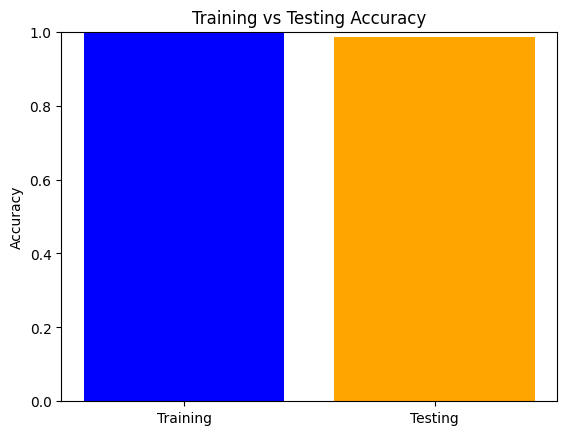

Training Accuracy: 1.00
Testing Accuracy: 0.98


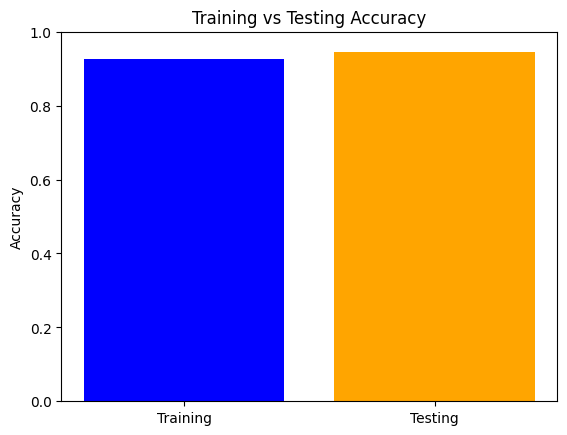

Training Accuracy: 0.93
Testing Accuracy: 0.94


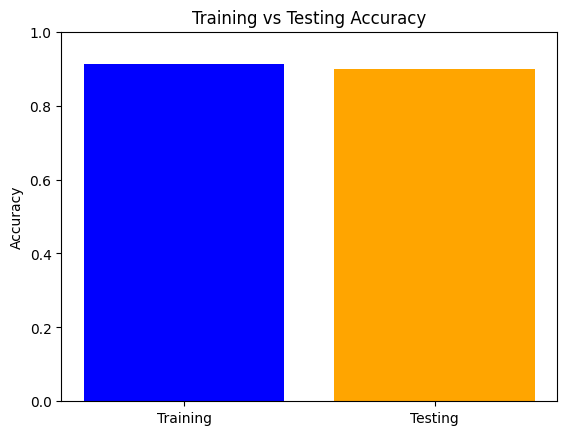

Training Accuracy: 0.91
Testing Accuracy: 0.90


In [48]:
import matplotlib.pyplot as plt

# Function to calculate performance for training and testing
def evaluate_overfitting(model, X_train, y_train, X_test, y_test):
    """
    Evaluates training and testing accuracy for a given model
    and plots the results to check for overfitting or underfitting.
    """
    # Training performance
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing performance
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Visualize the results
    scores = {'Training': train_accuracy, 'Testing': test_accuracy}
    plt.bar(scores.keys(), scores.values(), color=['blue', 'orange'])
    plt.ylim(0, 1)  # Scores are between 0 and 1
    plt.title('Training vs Testing Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

    # Print performance for reference
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")

# Example usage with Random Forest model
evaluate_overfitting(random_forest_model, X_train, y_train, X_test, y_test)

# Example usage with Logistic Regression model
evaluate_overfitting(logistic_regression_model, X_train, y_train, X_test, y_test)

# Example usage with K-Nearest Neighbors model
evaluate_overfitting(knn_model, X_train, y_train, X_test, y_test)


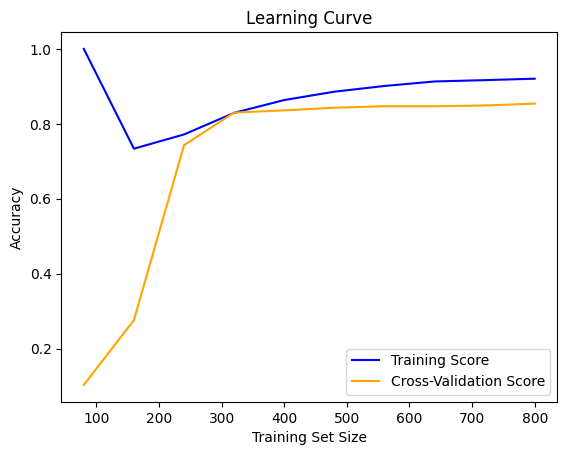

In [51]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5):
    """
    Plots the learning curve for a model using cross-validation.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Training Score", color='blue')
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color='orange')
    
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

# Example usage with Random Forest model
plot_learning_curve(knn_model, X, y)


### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Random Forest Cross-Validation
print("Random Forest Cross-Validation")
rf_cv_results = cross_validate(RandomForestClassifier(random_state=42), X, y, cv=5, scoring=scoring)
print(f"Mean Accuracy: {rf_cv_results['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {rf_cv_results['test_precision'].mean():.2f}")
print(f"Mean Recall: {rf_cv_results['test_recall'].mean():.2f}")
print(f"Mean F1 Score: {rf_cv_results['test_f1'].mean():.2f}\n")

# Logistic Regression Cross-Validation
print("Logistic Regression Cross-Validation")
lr_cv_results = cross_validate(LogisticRegression(max_iter=1000, random_state=42), X, y, cv=5, scoring=scoring)
print(f"Mean Accuracy: {lr_cv_results['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {lr_cv_results['test_precision'].mean():.2f}")
print(f"Mean Recall: {lr_cv_results['test_recall'].mean():.2f}")
print(f"Mean F1 Score: {lr_cv_results['test_f1'].mean():.2f}\n")

# K-Nearest Neighbors Cross-Validation
print("K-Nearest Neighbors Cross-Validation")
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), X, y, cv=5, scoring=scoring)
print(f"Mean Accuracy: {knn_cv_results['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {knn_cv_results['test_precision'].mean():.2f}")
print(f"Mean Recall: {knn_cv_results['test_recall'].mean():.2f}")
print(f"Mean F1 Score: {knn_cv_results['test_f1'].mean():.2f}")


Random Forest Cross-Validation
Mean Accuracy: 0.95
Mean Precision: 0.97
Mean Recall: 0.95
Mean F1 Score: 0.95

Logistic Regression Cross-Validation


c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Mean Accuracy: 0.90
Mean Precision: 0.91
Mean Recall: 0.90
Mean F1 Score: 0.90

K-Nearest Neighbors Cross-Validation
Mean Accuracy: 0.85
Mean Precision: 0.88
Mean Recall: 0.85
Mean F1 Score: 0.86


c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Metrics
Random Forest
Mean Accuracy: 0.95
Mean Precision: 0.97
Mean Recall: 0.95
Mean F1 Score: 0.95
Random Forest demonstrates the best performance:

High and consistent metrics across all cross-validation folds.
No convergence issues.
It is both precise (few false positives) and comprehensive (few false negatives).
Logistic Regression
Mean Accuracy: 0.90
Mean Precision: 0.91
Mean Recall: 0.90
Mean F1 Score: 0.90
While Logistic Regression achieves respectable metrics, the convergence issue hinders its evaluation. After addressing the warning, the performance might improve.

K-Nearest Neighbors (KNN)
Mean Accuracy: 0.85
Mean Precision: 0.88
Mean Recall: 0.85
Mean F1 Score: 0.86
KNN shows the lowest performance among the three models. This result suggests it is less suited for your dataset, potentially due to sensitivity to feature scaling or data sparsity.

Recommendation
Random Forest remains the best choice based on:

Superior performance across all metrics.
Consistency across cross-validation folds.
No convergence issues.

Logistic Regression can be considered a simpler alternative if:

The convergence warning is addressed.
Slightly reduced performance is acceptable in favor of interpretability.
KNN is not recommended due to its lower accuracy and potential over-sensitivity to the dataset characteristics.